In [18]:
import numpy as np
import pandas as pd

from sklearn.decomposition import NMF
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
from scipy.sparse.linalg import svds

In [34]:
from sklearn.model_selection import train_test_split

In [11]:
def load_data():
    rating = pd.read_csv('tables/ratings.csv')
    movie = pd.read_csv('tables/movies.csv')
    #df = pd.merge(rating, movie, on='movieId')
    return rating, movie

def get_matrix(rating):
    mtrx_df = rating.pivot(index = 'userId', columns ='movieId', values = 'rating')
    mtrx_np = mtrx_df.to_numpy()
    return mtrx_df, mtrx_np

def normalize_matrix(mtrx):
    ratings_mean = np.mean(mtrx, axis = 1)
    normalized_mtrx = mtrx - ratings_mean.reshape(-1, 1)
    transform_back= lambda pred : pred +  ratings_mean.reshape(-1, 1)
    return normalized_mtrx, transform_back

In [12]:
rating, movie= load_data()
mtrx_df, mtrx_np= get_matrix(rating)

#normalized_mtrx, transform_back= normalize_matrix(mtrx_np)

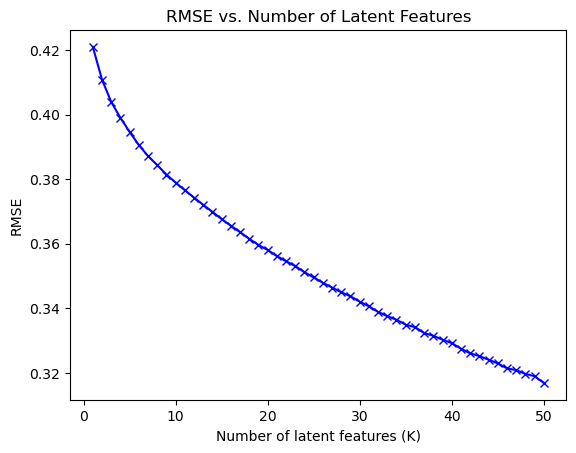

In [16]:
mtrx= (mtrx_df.fillna(0)).to_numpy()

input_mtrx= np.copy(mtrx)

# ???????
# Apply a non-negative transformation to the normalized ratings matrix
#transformed_mtrx = np.abs(normalized_mtrx)

# Calculate the NMF decomposition of the transformed ratings matrix
rmse_values = []
k_values = range(1, 51)

for k in k_values:
    #model = NMF(n_components=k, init='random', random_state=0, max_iter=1000)
    model = NMF(n_components=k, init='nndsvda', random_state=0, max_iter=1000)
    
    W = model.fit_transform(input_mtrx)
    H = model.components_
    all_predicted_ratings = np.dot(W, H) #+ ratings_mean.reshape(-1, 1)

    # Calculate the RMSE
    rmse = sqrt(mean_squared_error(mtrx, all_predicted_ratings))
    rmse_values.append(rmse)

# Plot the RMSE values for different values of K
plt.plot(k_values, rmse_values, 'bx-')
plt.xlabel('Number of latent features (K)')
plt.ylabel('RMSE')
plt.title('RMSE vs. Number of Latent Features')
plt.show()

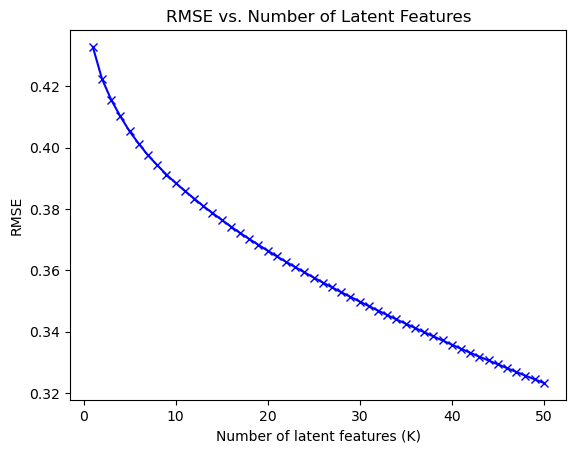

In [20]:
rmse_values=[]
k_values = range(1, 51)
for k in k_values:
    #print(k)
    U, sigma, Vt = svds(normalized_mtrx, k = k)
    sigma = np.diag(sigma)

    # Calculate the predicted ratings
    all_predicted_ratings = np.dot(np.dot(U, sigma), Vt)

    # Extract the actual ratings from the training data
    actual_ratings = mtrx

    # Calculate the RMSE
    rmse = sqrt(mean_squared_error(actual_ratings, all_predicted_ratings))
    rmse_values.append(rmse)

# Plot the RMSE values for different values of K
plt.plot(k_values, rmse_values, 'bx-')
plt.xlabel('Number of latent features (K)')
plt.ylabel('RMSE')
plt.title('RMSE vs. Number of Latent Features')
plt.show()

In [23]:
#array=mtrx_df.to_numpy()
#np.logical_not(np.isnan(array)).sum(axis=1)>5

In [45]:
rating

,userId,movieId,rating,timestamp
0,1,1,4.0,9.649827e+08
1,1,3,4.0,9.649812e+08
2,1,6,4.0,9.649822e+08
3,1,47,5.0,9.649838e+08
4,1,50,5.0,9.649829e+08
...,...,...,...,...
100888,615,5,5.0,6.592659e+09
100889,615,3,5.0,6.592659e+09
100890,615,8,5.0,6.592659e+09
100891,616,3,5.0,1.680316e+09


In [112]:
sub_train, sub_eval= train_test_split(rating, train_size=0.9, stratify= rating["userId"])

In [127]:
#mtrx_df_train

In [128]:


mtrx_df, _ = get_matrix(rating)
mtrx_df_train= mtrx_df.copy()
eval_idx= mtrx_df.copy()
eval_idx.iloc[:,:]=False

for i in range(sub_eval.shape[0]):
    mtrx_df_train.loc[sub_eval.iloc[i, 0], sub_eval.iloc[i, 1]]= None
    eval_idx.loc[sub_eval.iloc[i, 0], sub_eval.iloc[i, 1]]= True
    
eval_idx= eval_idx.to_numpy()

In [111]:
mtrx_df_train.shape, mtrx_df_val.shape, mtrx_df.shape 

((616, 9724), (616, 9724), (616, 9724))

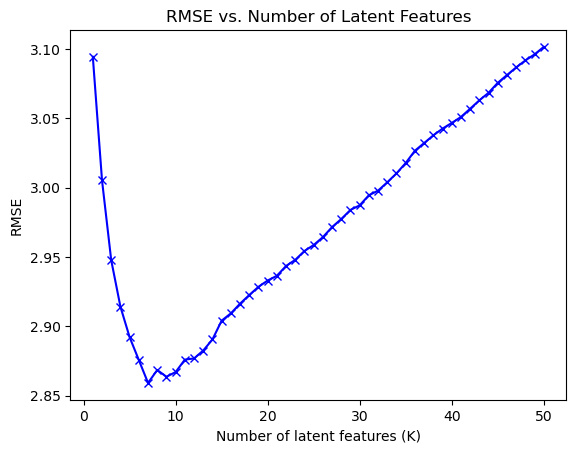

In [129]:

normalized_mtrx= (mtrx_df_train.fillna(0)).to_numpy()
mtrx_np= (mtrx_df.fillna(0)).to_numpy()



rmse_values=[]
k_values = range(1, 51)
for k in k_values:
    #print(k)
    U, sigma, Vt = svds(normalized_mtrx, k = k)
    sigma = np.diag(sigma)

    # Calculate the predicted ratings
    all_predicted_ratings = np.dot(np.dot(U, sigma), Vt)

    # Extract the actual ratings from the training data
    actual_ratings = mtrx

    # Calculate the RMSE
    rmse = sqrt(mean_squared_error(mtrx_np[eval_idx], all_predicted_ratings[eval_idx]))
    rmse_values.append(rmse)

# Plot the RMSE values for different values of K
plt.plot(k_values, rmse_values, 'bx-')
plt.xlabel('Number of latent features (K)')
plt.ylabel('RMSE')
plt.title('RMSE vs. Number of Latent Features')
plt.show()

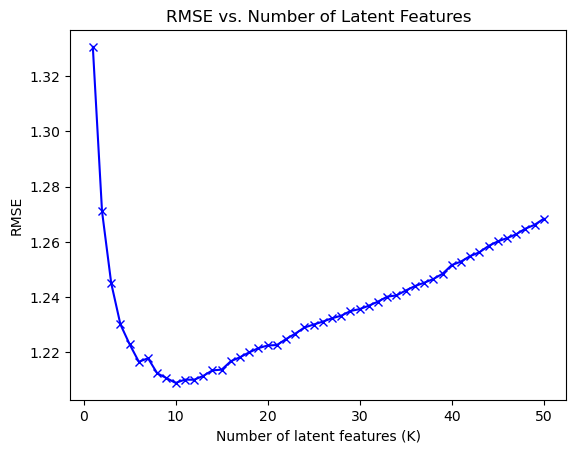

In [130]:
normalized_mtrx= (mtrx_df_train.fillna(2.5)).to_numpy()
mtrx_np= (mtrx_df.fillna(2.5)).to_numpy()



rmse_values=[]
k_values = range(1, 51)
for k in k_values:
    #print(k)
    U, sigma, Vt = svds(normalized_mtrx, k = k)
    sigma = np.diag(sigma)

    # Calculate the predicted ratings
    all_predicted_ratings = np.dot(np.dot(U, sigma), Vt)

    # Extract the actual ratings from the training data
    actual_ratings = mtrx

    # Calculate the RMSE
    rmse = sqrt(mean_squared_error(mtrx_np[eval_idx], all_predicted_ratings[eval_idx]))
    rmse_values.append(rmse)

# Plot the RMSE values for different values of K
plt.plot(k_values, rmse_values, 'bx-')
plt.xlabel('Number of latent features (K)')
plt.ylabel('RMSE')
plt.title('RMSE vs. Number of Latent Features')
plt.show()